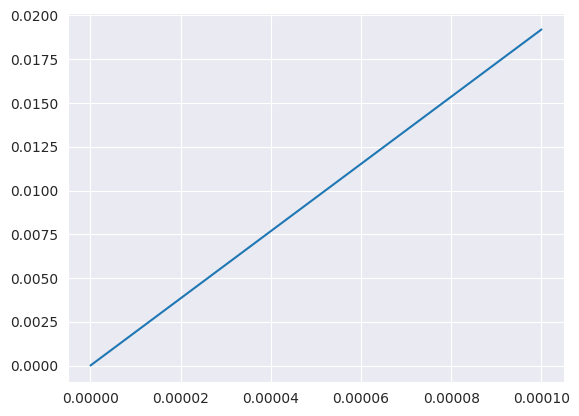

In [1]:
import matplotlib.pyplot as plt
import numpy as np

r2 = 2.0e-4  # bsh target at p2
r3 = 1.0e-5  # bsh target at p3

p3 = 1e-8  # p3
p2 = 1e-6
m = (r3 - r2) / (p3 - p2)

b = r3 - m * p3
round(b, 5)
x = np.array([1e-4, 1e-6, 1e-8])
y = m * x + b
plt.plot(x, y)

In [2]:
import seaborn as sns

sns.set_context("notebook", font_scale=1.25)


In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

0.70254 0.73725 new
[8.45454033e-03 3.32667213e-04 6.59887649e-05 1.30897092e-05]
0.50208 -0.99162 old
0.573 -0.709 old
0.747 -0.012 old


Text(0, 0.5, 'X Convergence Thresh')

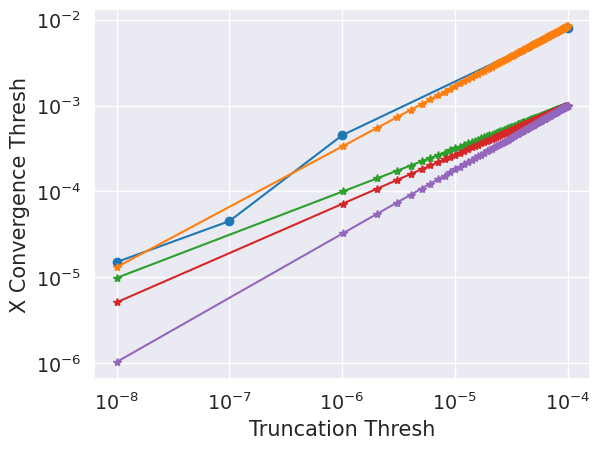

In [4]:
# new proposed settings 

xx = np.array([1e-4, 1e-6, 1e-7, 1e-8])
yy = np.array([8.0e-3, 4.5e-4, 4.5e-5,1.5e-5])

plt.plot(xx, yy, 'o-')
p = np.polyfit(np.log10(xx), np.log10(yy), 1)
digit = 5
a = np.round(p[0], digit)
b = np.round(p[1], digit)
print(a, b, 'new')
y_xx = (xx ** a) * 10 ** b
print(y_xx)
#c=p[2]
x_fitted = np.linspace(np.min(xx), np.max(xx), 100)
#y_fitted = p[3]+p[2]*x_fitted+p[1]*x_fitted**2+p[0]*x_fitted**3
y_fitted = (x_fitted ** a) * (10 ** b)
plt.loglog(x_fitted, y_fitted, '*-')
a = .50208
b = -.99162
print(a, b, 'old')
y_fitted = (x_fitted ** a) * (10 ** b)
y_fitted = (x_fitted ** a) * (10 ** b)
plt.loglog(x_fitted, y_fitted, '*-')

a = .573
b = -.709
print(a, b, 'old')
y_fitted = (x_fitted ** a) * (10 ** b)
y_fitted = (x_fitted ** a) * (10 ** b)
plt.loglog(x_fitted, y_fitted, '*-')

a = .747
b = -.012
print(a, b, 'old')
y_fitted = (x_fitted ** a) * (10 ** b)
y_fitted = (x_fitted ** a) * (10 ** b)
plt.loglog(x_fitted, y_fitted, '*-')

#y_xx= a+b*xx+c*xx**2
plt.xlabel('Truncation Thresh')
plt.ylabel('X Convergence Thresh')


In [5]:
from quantumresponsepro import MadnessReader
from quantumresponsepro import MadnessResponse
from pathlib import Path

In [6]:
path = Path('/mnt/data/madness_data/october23_tighter/high-high/')
path1 = Path('/mnt/data/madness_data/october23_compare/high-high/')

In [7]:
mreader = MadnessReader(path)

NaCl /mnt/data/madness_data/october23_tighter/high-high/hf/NaCl/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/NaCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/NaCl/beta.json'
Mg /mnt/data/madness_data/october23_tighter/high-high/hf/Mg/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Mg/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Mg/beta.json'


(<Figure size 550x440 with 1 Axes>, <Axes: >)

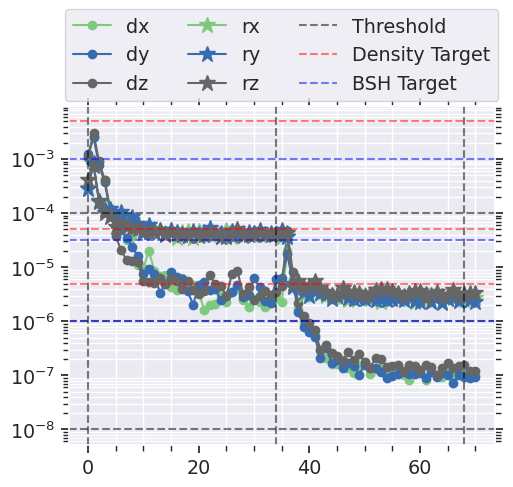

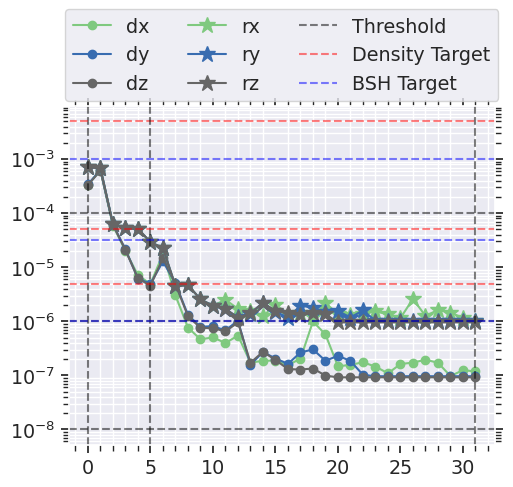

In [8]:
mol = 'NaCl'
xc = 'hf'

m = MadnessResponse(mol, xc, 'dipole', path)
m.plot_residuals()
m = MadnessResponse('Mg', xc, 'dipole', path)
m.plot_residuals()


NaCl /mnt/data/madness_data/october23_compare/high-high/hf/NaCl/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_compare/high-high/hf/NaCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_compare/high-high/hf/NaCl/beta.json'


(<Figure size 550x440 with 1 Axes>, <Axes: >)

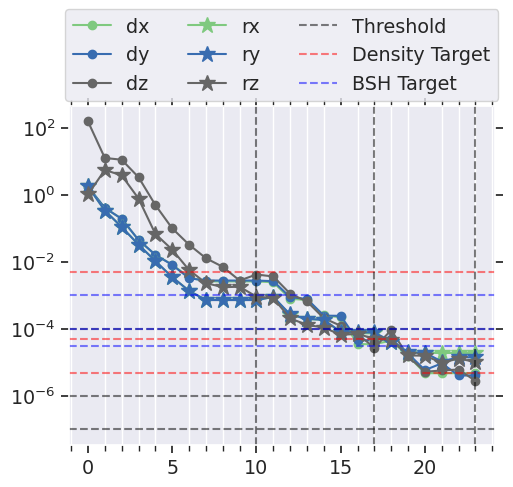

In [9]:

m = MadnessResponse(mol, xc, 'dipole', path1)
m.plot_residuals()

In [10]:
import pandas as pd


def get_mad_series(data_dir, molecules):
    mad_zz_data = {}

    for mol in molecules:
        try:
            print(mol)
            mad_mol = MadnessResponse(mol, 'hf', 'dipole', data_dir)
            mad_zz_data[mol] = mad_mol.polar_data.iloc[0]['zz']
        except KeyError as e:
            print(e)
            mad_zz_data[mol] = None
        except FileNotFoundError as e:
            print(e)
            mad_zz_data[mol] = None

    return pd.Series(mad_zz_data, name=data_dir.name)


fd_base = Path("/mnt/data/madness_data/fd_compare")


def get_fd_data(fd_base):
    fd_low_path = fd_base.joinpath("low-low")
    fd_high_path = fd_base.joinpath("high-high")

    fd_data_path = Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_data.csv")

    # read Finite Difference data from csv

    with open(fd_data_path, 'r') as f:
        fd_data = pd.read_csv(f)

    print(fd_data)

    molecules = fd_data['Molecule']
    print(molecules)

    lowlow = get_mad_series(fd_low_path, molecules)
    highhigh = get_mad_series(fd_high_path, molecules)

    mad_data = pd.concat([lowlow, highhigh], axis=1)
    # rename index to Molecules and reset_index
    mad_data.index.name = 'Molecule'
    mad_data.reset_index(inplace=True)
    mad_data = pd.concat([mad_data, fd_data.set_index('Molecule').reset_index(drop=True)], axis=1)

    # compute the percent error of madness data compared to finite difference data
    # FD data is in column FD
    # madness data is in other columns
    mad_data['Percent Error (low-low)'] = (mad_data['low-low'] - mad_data['FD']) / mad_data[
        'FD'] * 100
    mad_data['Percent Error (high-high)'] = (mad_data['high-high'] - mad_data['FD']) / mad_data[
        'FD'] * \
                                            100

    # reformat the molecules to have \ce{} around them
    mad_data_out = mad_data.copy()
    mad_data['Molecule'] = mad_data['Molecule'].apply(lambda x: "\\ce{" + x + "}")

    print(mad_data)
    # create a copy with just the percent error columns and FD column
    mad_data_percent_error = mad_data[
        ['Molecule', 'FD', 'Percent Error (low-low)',
         'Percent Error (high-high)', ]].copy()
    # rename the columns to be just low-low, high-low, high-high
    mad_data_percent_error.rename(columns={'Percent Error (low-low)': 'low-low',
                                           'Percent Error (high-high)': 'high-high'}, inplace=True)
    # set the index to be the molecule
    mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
    return mad_data_percent_error, mad_data_out



In [11]:
# set the display of percent error to scientific notation
pd.options.display.float_format = '{:.2e}'.format
mad_data_percent_error, mad_data = get_fd_data(fd_base)
# from the mad_percent error data.  
# Get the mean and std deviation of the low-low column
# and the high-high column and append it a row to the mad_data_percent_error dataframe 

# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)








  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-049418/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-098835/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-148253/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-197670/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-247088/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-296505/response_base.json
He /mnt/data/madness_dat

In [12]:
mad_data_percent_error


,FD,Low,High
Molecule,,,
\ce{He},1.32e+00,1.01e-03,2.86e-05
\ce{Be},4.56e+01,5.79e-03,-1.28e-04
\ce{Ne},2.38e+00,-2.60e-03,1.03e-04
\ce{Mg},8.16e+01,-5.90e-04,-5.35e-04
\ce{Ar},1.08e+01,1.98e-03,8.82e-05
\ce{N2},1.50e+01,-4.96e-03,-3.56e-06
\ce{F2},1.46e+01,2.48e-03,-4.20e-04
\ce{NaCl},2.87e+01,-3.57e-02,8.47e-05
\ce{LiCl},2.45e+01,8.03e-03,-4.10e-05


In [13]:


# write to latex table
fd_base = Path('/mnt/data/madness_data/fd_compare')

mad_data_percent_error, mad_data = get_fd_data(fd_base)
# set molecule to be the index
mad_data_percent_error.loc['Mean'] = mad_data_percent_error.abs().mean()
mad_data_percent_error.loc['Std Dev'] = mad_data_percent_error.abs().std()
#mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)
# set FD mean and std to NaN
mad_data_percent_error.loc['Mean', 'FD'] = np.nan
mad_data_percent_error.loc['Std Dev', 'FD'] = np.nan
mad_data_styled = mad_data_percent_error.style.format({'Low': '{:.2e}',
                                                       'High': '{:.2e}', })

mad_data_styled.to_latex(
    Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_data.tex"),
    siunitx=True)



  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-049418/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-098835/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-148253/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-197670/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-247088/response_base.json
He /mnt/data/madness_data/fd_compare/low-low/hf/He/dipole_hf_0-296505/response_base.json
He /mnt/data/madness_dat

In [14]:

# write to latex table
fd_base = Path('/mnt/data/madness_data/fd_compare2')

mad_data_percent_error, mad_data = get_fd_data(fd_base)
# set molecule to be the index
mad_data_percent_error.loc['Mean'] = mad_data_percent_error.abs().mean()
mad_data_percent_error.loc['Std Dev'] = mad_data_percent_error.abs().std()
#mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)
# set FD mean and std to NaN
mad_data_percent_error.loc['Mean', 'FD'] = np.nan
mad_data_percent_error.loc['Std Dev', 'FD'] = np.nan
mad_data_styled = mad_data_percent_error.style.format({'Low': '{:.2e}',
                                                       'High': '{:.2e}', })

mad_data_styled.to_latex(
    Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_data2.tex"),
    siunitx=True)



  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-000000/response_base.json
He /mnt/data/madness_data/fd_compare2/low-low/hf/He/dipole_hf_0-395340/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_compare2/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-000000/response_base.json
Be /mnt/data/madness_data/fd_compare2/low-low/hf/Be/dipole_hf_0-088930/response_base.json
/mnt/data/madness_data/fd_compare2/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/fd_comp

In [15]:

# write to latex table
fd_base = Path('/mnt/data/madness_data/october23_compare')

mad_data_percent_error, mad_data = get_fd_data(fd_base)
# set molecule to be the index
mad_data_percent_error.loc['Mean'] = mad_data_percent_error.abs().mean()
mad_data_percent_error.loc['Std Dev'] = mad_data_percent_error.abs().std()
#mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)
# set FD mean and std to NaN
mad_data_percent_error.loc['Mean', 'FD'] = np.nan
mad_data_percent_error.loc['Std Dev', 'FD'] = np.nan
mad_data_styled = mad_data_percent_error.style.format({'Low': '{:.2e}',
                                                       'High': '{:.2e}', })

mad_data_styled.to_latex(
    Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_dataOctober.tex"),
    siunitx=True)




  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/october23_compare/low-low/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_compare/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_compare/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/october23_compare/low-low/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_compare/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_compare/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_compare/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madne

In [16]:

# write to latex table
fd_base = Path('/mnt/data/madness_data/october23_tight')

mad_data_percent_error, mad_data = get_fd_data(fd_base)
# set molecule to be the index
mad_data_percent_error.loc['Mean'] = mad_data_percent_error.mean()
mad_data_percent_error.loc['Std Dev'] = mad_data_percent_error.std()
#mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)
# set FD mean and std to NaN
mad_data_percent_error.loc['Mean', 'FD'] = np.nan
mad_data_percent_error.loc['Std Dev', 'FD'] = np.nan
mad_data_styled = mad_data_percent_error.style.format({'Low': '{:.2e}',
                                                       'High': '{:.2e}', })

mad_data_styled.to_latex(
    Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_dataOctober_tight.tex"),
    siunitx=True)




  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/october23_tight/low-low/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/october23_tight/low-low/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tight/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/octobe

In [17]:
# write to latex table
fd_base = Path('/mnt/data/madness_data/october23_tighter')

mad_data_percent_error, mad_data = get_fd_data(fd_base)
# set molecule to be the index
mad_data_percent_error.loc['Mean'] = mad_data_percent_error.abs().mean()
mad_data_percent_error.loc['Std Dev'] = mad_data_percent_error.std()
#mad_data_percent_error.set_index('Molecule', inplace=True, drop=True)
# change the names of low-low and high-high columns to be just low and high
mad_data_percent_error.rename(columns={'low-low': 'Low', 'high-high': 'High'}, inplace=True)
# set FD mean and std to NaN
mad_data_percent_error.loc['Mean', 'FD'] = np.nan
mad_data_percent_error.loc['Std Dev', 'FD'] = np.nan
mad_data_styled = mad_data_percent_error.style.format({'Low': '{:.2e}',
                                                       'High': '{:.2e}', })

mad_data_styled.to_latex(
    Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_dataOctober_tight.tex"),
    siunitx=True)

  Molecule       FD
0       He 1.32e+00
1       Be 4.56e+01
2       Ne 2.38e+00
3       Mg 8.16e+01
4       Ar 1.08e+01
5       N2 1.50e+01
6       F2 1.46e+01
7     NaCl 2.87e+01
8     LiCl 2.45e+01
9       CO 1.45e+01
0      He
1      Be
2      Ne
3      Mg
4      Ar
5      N2
6      F2
7    NaCl
8    LiCl
9      CO
Name: Molecule, dtype: object
He
He /mnt/data/madness_data/october23_tighter/low-low/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/low-low/hf/He/beta.json'
Be
Be /mnt/data/madness_data/october23_tighter/low-low/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madne

In [18]:



fd_data_path = Path("/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/FD_data.csv")

# read Finite Difference data from csv

with open(fd_data_path, 'r') as f:
    fd_data = pd.read_csv(f)


# make the above procedure into a function
def get_z_residuals(mol, path):
    m = MadnessResponse(mol, xc, 'dipole', path)
    freq_key = m.frequencies[0]
    rd = m.data['convergence'][freq_key]['density_residuals'].rename(
        columns={'x': 'dx', 'y': 'dy', 'z': 'dz'})
    try:
        rx = m.data['convergence'][freq_key]['x_relative_residuals'].loc[:, ['x', 'y', 'z']].rename(
            columns={'x': 'rx', 'y': 'ry', 'z': 'rz'})
    except:
        rx = m.data['convergence'][freq_key]['x_residual'].loc[:, ['x', 'y', 'z']].rename(
            columns={'x': 'rx', 'y': 'ry', 'z': 'rz'})
        
    x = (m.data['convergence'][freq_key]['x'].loc[:, ['xx', 'yy', 'zz']].rename(columns={'xx':
                                                                                             'xnorm',
                                                                                         'yy': 'ynorm',
                                                                                         'zz':
                                                                                             'znorm'}))
    x = np.sqrt(x)
    alpha = m.data['convergence'][freq_key]['alpha'].loc[:, ['zz']]
    iters = m.num_iter_proto[m.frequencies[0]]
    iters = [i - 1 for i in iters]

    residuals = pd.concat(
        [rx.iloc[iters, 2], rd.iloc[iters, 2], x.iloc[iters, 2], alpha.iloc[iters]],
        axis=1)
    # reindex as low, medium, high
    # if index is size 2 then its just low and medium
    if len(residuals.index) == 2:
        residuals.index = ['Low', 'Medium']
    else:
        residuals.index = ['Low', 'Medium', 'High']
    # rename columns as max bsh and max density
    residuals.rename(columns={0: 'z bsh', 1: 'z density', 'zz': 'MRA'}, inplace=True)
    # add a column for the FD value of the molecule
    residuals['FD'] = fd_data.loc[fd_data['Molecule'] == mol, 'FD'].values[0]
    # get the percent error
    residuals['Percent Error'] = (residuals['MRA'] - residuals['FD']) / residuals['FD'] * 100
    residuals['Absolute Percent Error'] = residuals['Percent Error'].abs()
    residuals['Absolute Residual Z'] = residuals['rz'] * residuals['znorm']
    # add a column for molecule
    residuals['Molecule'] = mol
    return residuals




def get_database_residuals_z(mols, path):
    residuals = pd.DataFrame()
    for mol in mols:
        print(mol)
        try:
            residuals = pd.concat([residuals, get_z_residuals(mol, path)], axis=0)
        except (KeyError, FileNotFoundError) as e:
            print(e)
            continue
    # reset the index
    residuals.reset_index(inplace=True, drop=False)
    # rename the index to be protocol
    residuals.rename(columns={'index': 'Protocol'}, inplace=True)
    return residuals


In [19]:

mols = ['Be', 'Ne', 'He', 'LiCl', 'NaCl', 'N2', 'F2', 'Ar', 'CO']



In [20]:


# make the above procedure into a function
def get_max_residuals(mol, path):
    m = MadnessResponse(mol, xc, 'dipole', path)
    freq_key = m.frequencies[0]
    rd = m.data['convergence'][freq_key]['density_residuals'].rename(
        columns={'x': 'dx', 'y': 'dy', 'z': 'dz'})
    rx = m.data['convergence'][freq_key]['x_relative_residuals'].loc[:, ['x', 'y', 'z']].rename(
        columns={'x': 'rx', 'y': 'ry', 'z': 'rz'})
    iters = m.num_iter_proto[m.frequencies[0]]

    x = (m.data['convergence'][freq_key]['x'].loc[:, ['xx', 'yy', 'zz']].rename(columns={'xx':
                                                                                             'xnorm',
                                                                                         'yy': 'ynorm',
                                                                                         'zz':
                                                                                             'znorm'}))
    
    x = np.sqrt(x)
    iters = [i - 1 for i in iters]
    residuals = pd.concat([rx.iloc[iters], rd.iloc[iters], x.iloc[iters]], axis=1)
    # reindex as low, medium, high
    if len(residuals.index) == 2:
        residuals.index = ['Low', 'Medium']
    else:
        residuals.index = ['Low', 'Medium', 'High']
        
    
    # multiply by the norm of x to get the absolute residual
    residuals['Absolute Residual X'] = residuals['rx'] * residuals['xnorm']
    
    residuals['Absolute Residual Y'] = residuals['ry'] * residuals['ynorm']
    residuals['Absolute Residual Z'] = residuals['rz'] * residuals['znorm']
    # add a column for molecule
    residuals['molecule'] = mol
    
    # rename the columns
    
    
    
    return residuals


def get_database_residuals(mols, path):
    residuals = pd.DataFrame()
    for mol in mols:
        print(mol)
        try:
            residuals = pd.concat([residuals, get_max_residuals(mol, path)], axis=0)
        except (KeyError,FileNotFoundError) as e:
            continue
    # reset the index
    residuals.reset_index(inplace=True, drop=False)
    # rename the index to be protocol
    residuals.rename(columns={'index': 'Protocol'}, inplace=True)
    return residuals


path = Path('/mnt/data/madness_data/october23_tighter/high-high/')
residuals = get_database_residuals(mols, path)
residuals

Be
Be /mnt/data/madness_data/october23_tighter/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json'
LiCl
/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.js

,Protocol,rx,ry,rz,dx,dy,dz,xnorm,ynorm,znorm,Absolute Residual X,Absolute Residual Y,Absolute Residual Z,molecule
0,Low,2.84e-04,2.84e-04,2.84e-04,2.07e-03,2.07e-03,2.07e-03,2.64e+00,2.64e+00,2.64e+00,7.48e-04,7.48e-04,7.48e-04,Be
1,Medium,2.55e-05,2.55e-05,2.55e-05,4.09e-06,4.09e-06,4.09e-06,2.64e+00,2.64e+00,2.64e+00,6.72e-05,6.72e-05,6.72e-05,Be
2,High,9.45e-07,9.45e-07,9.45e-07,8.29e-08,8.29e-08,8.29e-08,2.64e+00,2.64e+00,2.64e+00,2.49e-06,2.49e-06,2.49e-06,Be
3,Low,2.31e-04,2.26e-04,2.27e-04,1.58e-04,1.51e-04,1.51e-04,8.34e-01,8.34e-01,8.34e-01,1.93e-04,1.88e-04,1.89e-04,Ne
4,Medium,1.27e-05,2.90e-05,3.02e-05,1.62e-05,4.71e-05,4.71e-05,8.34e-01,8.34e-01,8.34e-01,1.06e-05,2.42e-05,2.52e-05,Ne
5,High,3.62e-06,3.22e-06,2.88e-06,3.12e-08,3.33e-08,1.32e-07,8.34e-01,8.34e-01,8.34e-01,3.02e-06,2.69e-06,2.40e-06,Ne
6,Low,1.85e-04,1.85e-04,1.85e-04,1.00e-05,1.00e-05,1.00e-05,7.48e-01,7.48e-01,7.48e-01,1.38e-04,1.38e-04,1.38e-04,He
7,Medium,2.32e-05,2.32e-05,2.32e-05,7.11e-06,7.11e-06,7.11e-06,7.48e-01,7.48e-01,7.48e-01,1.74e-05,1.74e-05,1.74e-05,He
8,High,9.31e-07,9.31e-07,9.31e-07,1.50e-08,1.50e-08,1.50e-08,7.48e-01,7.48e-01,7.48e-01,6.97e-07,6.97e-07,6.97e-07,He
9,Low,2.92e-04,2.79e-04,4.04e-04,1.06e-03,1.25e-03,1.08e-03,1.95e+00,1.95e+00,2.02e+00,5.70e-04,5.46e-04,8.18e-04,NaCl


In [21]:
def get_database_residuals_z(mols, path):
    residuals = pd.DataFrame()
    for mol in mols:
        print(mol)
        try:
            residuals = pd.concat([residuals, get_z_residuals(mol, path)], axis=0)
        except (KeyError , FileNotFoundError) as e:
            print(e)
            continue
    # reset the index
    residuals.reset_index(inplace=True, drop=False)
    # rename the index to be protocol
    residuals.rename(columns={'index': 'Protocol'}, inplace=True)
    return residuals

In [22]:
path = Path('/mnt/data/madness_data/october23_tighter/low-low/')
residuals = get_database_residuals_z(mols, path)

Be
Be /mnt/data/madness_data/october23_tighter/low-low/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/low-low/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/low-low/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/low-low/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/low-low/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/low-low/hf/He/beta.json'
LiCl
LiCl /mnt/data/madness_data/october23_tighter/low-low/hf/LiCl/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/low-low/hf/LiCl/beta.json
[Errno 2] No such file o

In [23]:
# create a 2 x 1 plot with seaborn plotting protocol and max bsh and max density
def plot_residuals(residuals):
    sns.set_context("notebook", font_scale=.8)
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    scale = 2
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), sharey=False)
    sns.scatterplot(x='Protocol', y='rz', data=residuals, hue='Molecule', ax=ax[0][0])
    sns.scatterplot(x='Protocol', y='dz', data=residuals, hue='Molecule', ax=ax[0][1])
    sns.scatterplot(x='Protocol', y='Absolute Residual Z', hue='Molecule', data=residuals,
                    ax=ax[0][2])

    sns.scatterplot(x='rz', y='Absolute Percent Error', data=residuals, hue='Molecule',
                    ax=ax[1][0], style='Protocol')
    sns.scatterplot(x='dz', y='Absolute Percent Error', data=residuals, hue='Molecule',
                    style='Protocol', ax=ax[1][1])
    sns.scatterplot(x='Absolute Residual Z', y='Absolute Percent Error', data=residuals,
                    hue='Molecule', ax=ax[1][2], style='Protocol')
    ax[0][0].set_yscale('log')
    ax[0][1].set_yscale('log')
    ax[0][2].set_yscale('log')

    ax[1][0].set_xscale('log')
    ax[1][1].set_xscale('log')
    ax[1][2].set_xscale('log')
    ax[1][0].set_yscale('log')
    ax[1][1].set_yscale('log')
    ax[1][2].set_yscale('log')

    # remove all legends and replace with the legend for the last plot
    ax[0][0].legend_.remove()
    ax[0][1].legend_.remove()
    ax[0][2].legend_.remove()
    ax[1][0].legend_.remove()
    ax[1][1].legend_.remove()
    ax[1][2].legend_.remove()
    ax[1][2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig.tight_layout()

    # plot the linear regression fit on the same axis




Be
Be /mnt/data/madness_data/october23_tighter/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json'
LiCl
/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.js

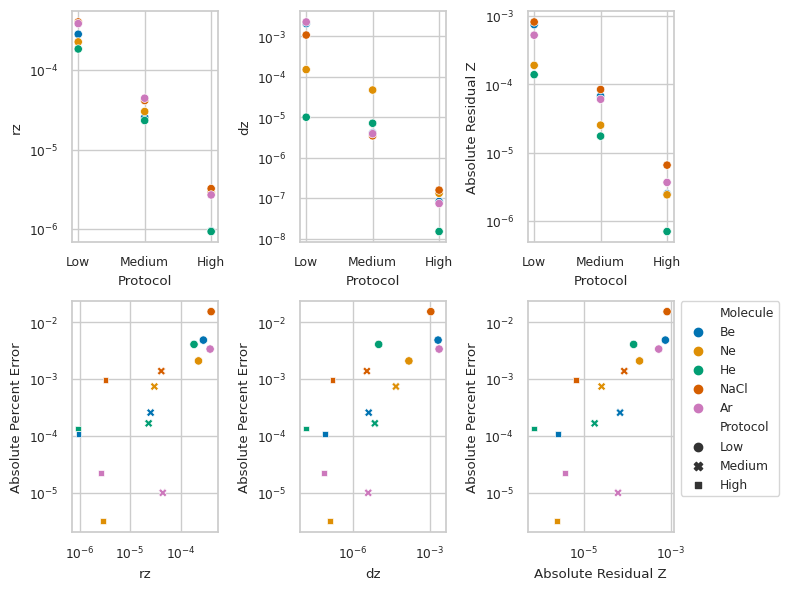

In [24]:

path = Path('/mnt/data/madness_data/october23_tighter/high-high/')
residuals = get_database_residuals_z(mols, path)
plot_residuals(residuals)



In [25]:
path = Path('/mnt/data/madness_data/october23_tighter/high-high/')
residuals = get_database_residuals(mols, path)

Be
Be /mnt/data/madness_data/october23_tighter/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json'
LiCl
/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.js

In [26]:
residuals

,Protocol,rx,ry,rz,dx,dy,dz,xnorm,ynorm,znorm,Absolute Residual X,Absolute Residual Y,Absolute Residual Z,molecule
0,Low,2.84e-04,2.84e-04,2.84e-04,2.07e-03,2.07e-03,2.07e-03,2.64e+00,2.64e+00,2.64e+00,7.48e-04,7.48e-04,7.48e-04,Be
1,Medium,2.55e-05,2.55e-05,2.55e-05,4.09e-06,4.09e-06,4.09e-06,2.64e+00,2.64e+00,2.64e+00,6.72e-05,6.72e-05,6.72e-05,Be
2,High,9.45e-07,9.45e-07,9.45e-07,8.29e-08,8.29e-08,8.29e-08,2.64e+00,2.64e+00,2.64e+00,2.49e-06,2.49e-06,2.49e-06,Be
3,Low,2.31e-04,2.26e-04,2.27e-04,1.58e-04,1.51e-04,1.51e-04,8.34e-01,8.34e-01,8.34e-01,1.93e-04,1.88e-04,1.89e-04,Ne
4,Medium,1.27e-05,2.90e-05,3.02e-05,1.62e-05,4.71e-05,4.71e-05,8.34e-01,8.34e-01,8.34e-01,1.06e-05,2.42e-05,2.52e-05,Ne
5,High,3.62e-06,3.22e-06,2.88e-06,3.12e-08,3.33e-08,1.32e-07,8.34e-01,8.34e-01,8.34e-01,3.02e-06,2.69e-06,2.40e-06,Ne
6,Low,1.85e-04,1.85e-04,1.85e-04,1.00e-05,1.00e-05,1.00e-05,7.48e-01,7.48e-01,7.48e-01,1.38e-04,1.38e-04,1.38e-04,He
7,Medium,2.32e-05,2.32e-05,2.32e-05,7.11e-06,7.11e-06,7.11e-06,7.48e-01,7.48e-01,7.48e-01,1.74e-05,1.74e-05,1.74e-05,He
8,High,9.31e-07,9.31e-07,9.31e-07,1.50e-08,1.50e-08,1.50e-08,7.48e-01,7.48e-01,7.48e-01,6.97e-07,6.97e-07,6.97e-07,He
9,Low,2.92e-04,2.79e-04,4.04e-04,1.06e-03,1.25e-03,1.08e-03,1.95e+00,1.95e+00,2.02e+00,5.70e-04,5.46e-04,8.18e-04,NaCl


In [27]:
residuals = get_database_residuals(mols, path)
residuals


Be
Be /mnt/data/madness_data/october23_tighter/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json'
LiCl
/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.js

,Protocol,rx,ry,rz,dx,dy,dz,xnorm,ynorm,znorm,Absolute Residual X,Absolute Residual Y,Absolute Residual Z,molecule
0,Low,2.84e-04,2.84e-04,2.84e-04,2.07e-03,2.07e-03,2.07e-03,2.64e+00,2.64e+00,2.64e+00,7.48e-04,7.48e-04,7.48e-04,Be
1,Medium,2.55e-05,2.55e-05,2.55e-05,4.09e-06,4.09e-06,4.09e-06,2.64e+00,2.64e+00,2.64e+00,6.72e-05,6.72e-05,6.72e-05,Be
2,High,9.45e-07,9.45e-07,9.45e-07,8.29e-08,8.29e-08,8.29e-08,2.64e+00,2.64e+00,2.64e+00,2.49e-06,2.49e-06,2.49e-06,Be
3,Low,2.31e-04,2.26e-04,2.27e-04,1.58e-04,1.51e-04,1.51e-04,8.34e-01,8.34e-01,8.34e-01,1.93e-04,1.88e-04,1.89e-04,Ne
4,Medium,1.27e-05,2.90e-05,3.02e-05,1.62e-05,4.71e-05,4.71e-05,8.34e-01,8.34e-01,8.34e-01,1.06e-05,2.42e-05,2.52e-05,Ne
5,High,3.62e-06,3.22e-06,2.88e-06,3.12e-08,3.33e-08,1.32e-07,8.34e-01,8.34e-01,8.34e-01,3.02e-06,2.69e-06,2.40e-06,Ne
6,Low,1.85e-04,1.85e-04,1.85e-04,1.00e-05,1.00e-05,1.00e-05,7.48e-01,7.48e-01,7.48e-01,1.38e-04,1.38e-04,1.38e-04,He
7,Medium,2.32e-05,2.32e-05,2.32e-05,7.11e-06,7.11e-06,7.11e-06,7.48e-01,7.48e-01,7.48e-01,1.74e-05,1.74e-05,1.74e-05,He
8,High,9.31e-07,9.31e-07,9.31e-07,1.50e-08,1.50e-08,1.50e-08,7.48e-01,7.48e-01,7.48e-01,6.97e-07,6.97e-07,6.97e-07,He
9,Low,2.92e-04,2.79e-04,4.04e-04,1.06e-03,1.25e-03,1.08e-03,1.95e+00,1.95e+00,2.02e+00,5.70e-04,5.46e-04,8.18e-04,NaCl


In [28]:
# plot protocol vs Absolute X Y Z residuals
def plot_absolute_residuals(residuals):
    
    sns.set_context("notebook", font_scale=1.0)
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    scale = 2
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharey=True)
    sns.scatterplot(x='Protocol', y='Absolute Residual X', data=residuals, hue='molecule', ax=ax[0])
    sns.scatterplot(x='Protocol', y='Absolute Residual Y', data=residuals, hue='molecule', ax=ax[1])
    sns.scatterplot(x='Protocol', y='Absolute Residual Z', data=residuals, hue='molecule', ax=ax[2])
    ax[0].set_yscale('log')
    ax[1].set_yscale('log')
    ax[2].set_yscale('log')
    ax[0].set_ylabel('Absolute Residual')
    ax[0].set_xlabel('Protocol')
    
    ax[1].set_xlabel('Protocol')
    ax[2].set_xlabel('Protocol')
    ax[1].legend_.remove()
    ax[0].legend_.remove()
    ax[2].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    # add titles
    ax[0].set_title('X')
    ax[1].set_title('Y')
    ax[2].set_title('Z')
    
    fig.tight_layout()
    return fig


Be
Be /mnt/data/madness_data/october23_tighter/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tighter/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tighter/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/He/beta.json'
LiCl
/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tighter/high-high/hf/LiCl/beta.js

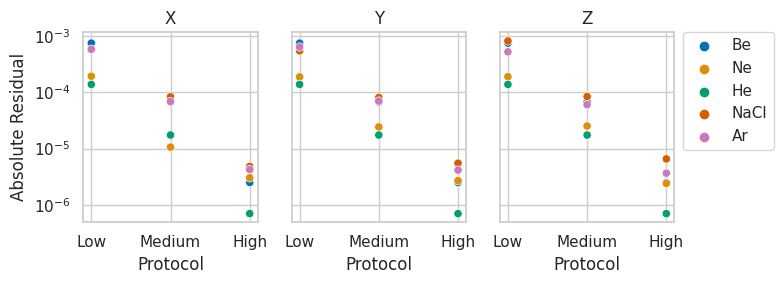

In [29]:

path = Path('/mnt/data/madness_data/october23_tighter/high-high/')
f=plot_absolute_residuals(get_database_residuals(mols,path))

Be
Be /mnt/data/madness_data/october23_tight/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october23_tight/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october23_tight/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/high-high/hf/He/beta.json'
LiCl
LiCl /mnt/data/madness_data/october23_tight/high-high/hf/LiCl/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/high-high/hf/LiCl/beta.json
[Errno 2] No such file o

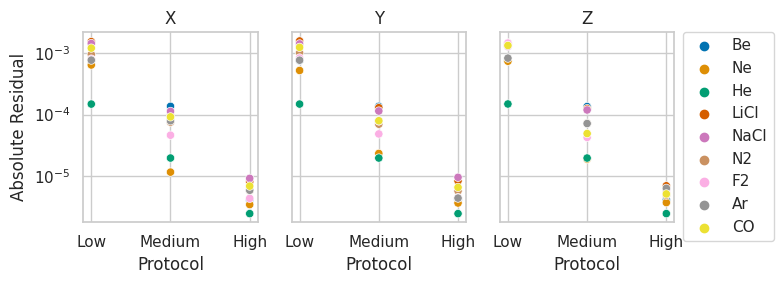

In [30]:
path = Path('/mnt/data/madness_data/october23_tight/high-high/')
f=plot_absolute_residuals(get_database_residuals(mols,path))

F2 /mnt/data/madness_data/october23_tight/high-high/hf/F2/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october23_tight/high-high/hf/F2/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october23_tight/high-high/hf/F2/beta.json'


(<Figure size 550x440 with 1 Axes>, <Axes: >)

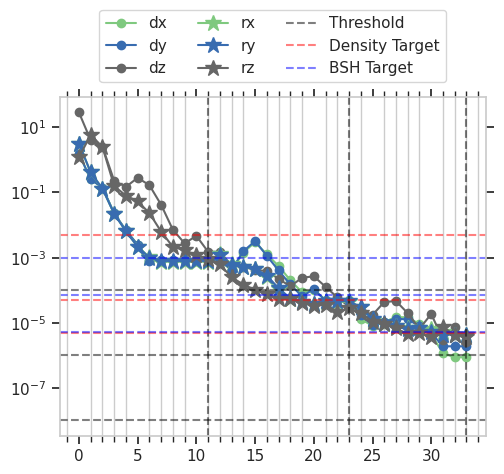

In [31]:
m = MadnessResponse('F2', xc, 'dipole', path)
m.plot_residuals()

Be
Be /mnt/data/madness_data/october_absolute/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json'
'x_residual'
Ne
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/Ne/moldft.calc_info.json'
He
He /mnt/data/madness_data/october_absolute/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/He/beta.json'
'x_residual'
LiCl
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/LiCl/moldft.calc_info.json'
NaCl
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/NaCl/moldft.calc_info.json'
N2
[Errno 2] No such file or directory: '/mnt/data/madness_data/

ValueError: Could not interpret value `rz` for parameter `y`

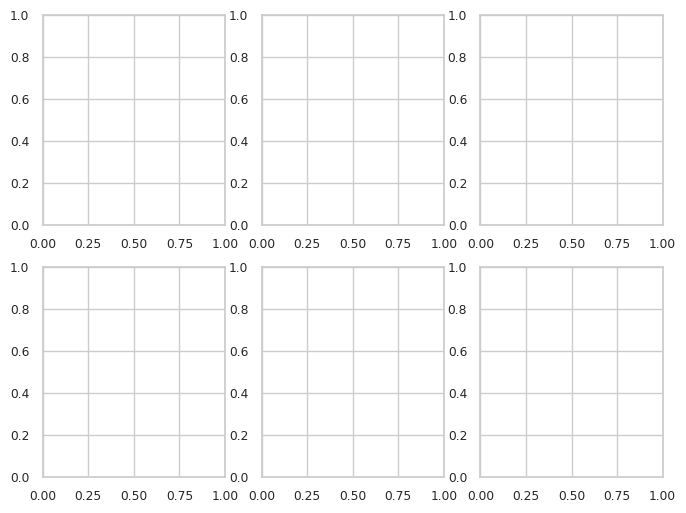

In [32]:

path = Path('/mnt/data/madness_data/october_absolute/high-high/')
residuals = get_database_residuals_z(mols, path)
plot_residuals(residuals)

In [40]:
def get_z_residuals(mol, path):
    m = MadnessResponse(mol, xc, 'dipole', path)
    freq_key = m.frequencies[0]
    rd = m.data['convergence'][freq_key]['density_residuals'].rename(
        columns={'x': 'dx', 'y': 'dy', 'z': 'dz'})
    try:
        rx = m.data['convergence'][freq_key]['x_relative_residuals'].loc[:, ['x', 'y', 'z']].rename(
            columns={'x': 'rx', 'y': 'ry', 'z': 'rz'})
    except KeyError as e:
        rx = m.data['convergence'][freq_key]['x_residuals'].loc[:, ['x', 'y', 'z']].rename(
            columns={'x': 'rx', 'y': 'ry', 'z': 'rz'})

    x = (m.data['convergence'][freq_key]['x'].loc[:, ['xx', 'yy', 'zz']].rename(columns={'xx':
                                                                                             'xnorm',
                                                                                         'yy': 'ynorm',
                                                                                         'zz':
                                                                                             'znorm'}))
    x = np.sqrt(x)
    alpha = m.data['convergence'][freq_key]['alpha'].loc[:, ['zz']]
    iters = m.num_iter_proto[m.frequencies[0]]
    iters = [i - 1 for i in iters]

    residuals = pd.concat(
        [rx.iloc[iters, 2], rd.iloc[iters, 2], x.iloc[iters, 2], alpha.iloc[iters]],
        axis=1)
    # reindex as low, medium, high
    # if index is size 2 then its just low and medium
    if len(residuals.index) == 2:
        residuals.index = ['Low', 'Medium']
    else:
        residuals.index = ['Low', 'Medium', 'High']
    # rename columns as max bsh and max density
    residuals.rename(columns={0: 'z bsh', 1: 'z density', 'zz': 'MRA'}, inplace=True)
    # add a column for the FD value of the molecule
    residuals['FD'] = fd_data.loc[fd_data['Molecule'] == mol, 'FD'].values[0]
    # get the percent error
    residuals['Percent Error'] = (residuals['MRA'] - residuals['FD']) / residuals['FD'] * 100
    residuals['Absolute Percent Error'] = residuals['Percent Error'].abs()
    residuals['Absolute Residual Z'] = residuals['rz'] * residuals['znorm']
    # add a column for molecule
    residuals['Molecule'] = mol
    return residuals




def get_database_residuals_z(mols, path):
    residuals = pd.DataFrame()
    for mol in mols:
        print(mol)
        try:
            residuals = pd.concat([residuals, get_z_residuals(mol, path)], axis=0)
        except (KeyError, FileNotFoundError) as e:
            print(e)
            continue
    # reset the index
    residuals.reset_index(inplace=True, drop=False)
    # rename the index to be protocol
    residuals.rename(columns={'index': 'Protocol'}, inplace=True)
    return residuals


Be
Be /mnt/data/madness_data/october_absolute/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json'
Ne
Ne /mnt/data/madness_data/october_absolute/high-high/hf/Ne/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/Ne/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/Ne/beta.json'
He
He /mnt/data/madness_data/october_absolute/high-high/hf/He/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/He/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/He/beta.json'
LiCl
LiCl /mnt/data/madness_data/october_absolute/high-high/hf/LiCl/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/LiCl/beta.json
[Errno 2] No 

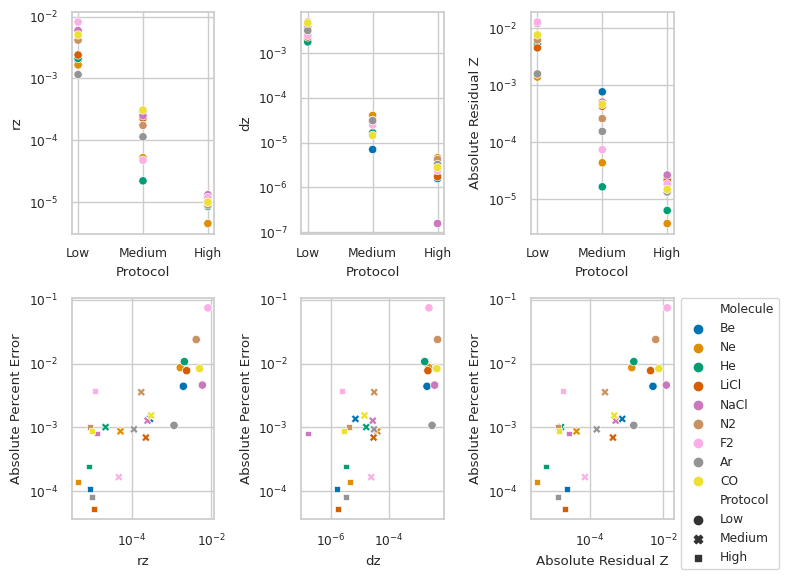

In [47]:
residuals=get_database_residuals_z(mols,path)
plot_residuals(residuals)


F2 /mnt/data/madness_data/october_absolute/high-high/hf/F2/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/F2/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/F2/beta.json'


KeyError: 'x_relative_residuals'

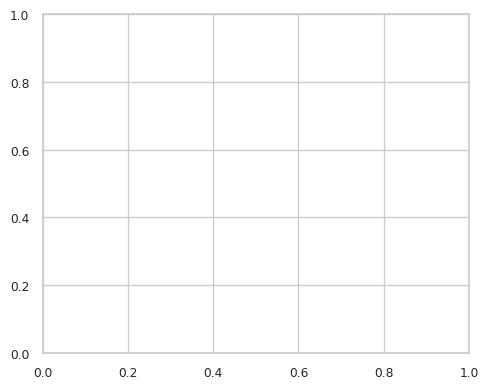

In [49]:
m = MadnessResponse('F2', xc, 'dipole', path)
m.plot_residuals()

Be /mnt/data/madness_data/october_absolute/high-high/hf/Be/dipole_hf_0-000000/response_base.json
/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json
[Errno 2] No such file or directory: '/mnt/data/madness_data/october_absolute/high-high/hf/Be/beta.json'


In [ ]:
m.data['convergence']['0.0'].keys()